In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, naive_bayes
from sklearn.model_selection import train_test_split

In [2]:
# Read data
digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples,-1))
y = digits.target
# 
print(len(X))
print(len(y))

1797
1797


In [3]:
## Train Test split to evaluate the performance of model

In [14]:
# Split data into 80% train and 20% test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [15]:
# Create a classifier: Gaussian Naive Bayes
gnb = naive_bayes.GaussianNB()


In [16]:
# Training model by fitting data to model (one step training)
gnb.fit(X_train,y_train)


GaussianNB()

In [12]:
predicted = gnb.predict(X_test)

In [18]:
print(predicted)

[2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 3 8 4 9 7 7 3 5 9 0 0 2 2 7 8 2 0 9 2 6
 3 3 7 3 3 4 6 6 6 4 9 9 5 0 5 5 2 8 2 0 0 9 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6
 8 4 3 9 4 0 5 3 6 9 6 9 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 0 0 8 9 8 0 1 2
 1 4 5 6 8 1 9 0 8 1 3 4 5 6 7 0 1 2 3 4 5 1 7 5 7 4 9 5 5 6 5 0 7 7 5 8 4
 1 7 7 8 5 1 0 0 1 2 7 8 1 0 1 9 6 8 7 7 7 8 7 6 6 6 7 7 1 5 0 9 1 9 1 0 1
 7 6 3 2 1 7 7 6 3 1 3 7 1 2 6 1 4 3 1 4 0 5 3 6 9 6 1 7 5 4 7 7 6 2 5 5 1
 5 8 4 5 0 7 7 7 0 8 2 5 4 5 6 7 8 9 0 1 8 8 4 5 6 7 8 9 0 1 2 5 4 5 6 7 8
 9 0 9 5 5 6 5 0 9 8 9 8 7 1 7 7 7 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8 8 5 8 4 6
 6 6 4 9 1 5 0 9 5 2 8 2 0 0 8 7 6 3 2 1 7 4 6 3 8 3 9 1 7 6 8 4 5 1 4 0 5
 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 1 4 9 0 1 9 8]


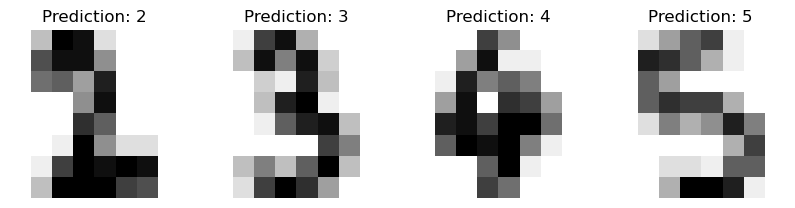

In [19]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [20]:
# Classification report:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(y_test,predicted)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  4  7]
 [ 0  3 28  0  0  0  1  0  1  2]
 [ 0  1  0 22  0  4  0  3  7  0]
 [ 0  0  0  0 31  0  0  5  1  0]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  1  0  0  1  0 32  2  0]
 [ 0  5  0  0  0  1  0  3 24  0]
 [ 1  1  0  1  0  3  0  6  0 25]]


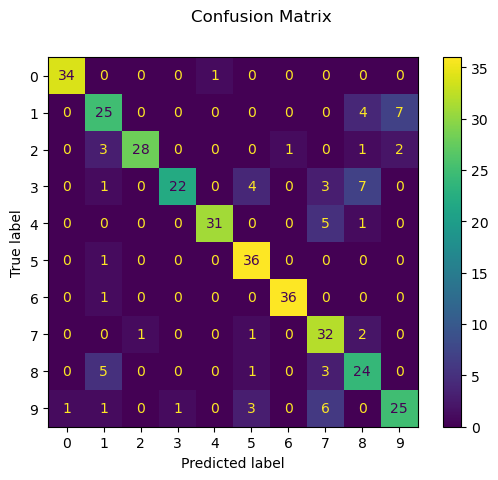

In [21]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [22]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360




In [23]:
# Create a classifier: a Multinomial Naive Bayes
mNB = naive_bayes.MultinomialNB()


In [24]:
# Training model by fitting data to model (one step training)
mNB.fit(X_train,y_train)

MultinomialNB()

In [25]:
# Predict the value of the digit on the test subset
mnb_predicted = mNB.predict(X_test)


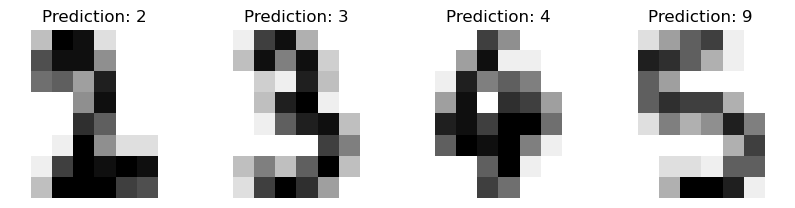

In [26]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test,mnb_predicted):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [27]:
# Classification report:
print(f"Classification report for classifier {mNB}:\n"
      f"{metrics.classification_report(y_test,predicted)}\n")

Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360




Confusion matrix:
[[32  0  0  0  3  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  3  9]
 [ 1  1 33  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  1  0  3  8  1]
 [ 0  0  0  0 34  0  0  0  3  0]
 [ 0  0  0  0  1 30  0  0  0  6]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 33  2  0]
 [ 0  2  0  0  1  0  0  1 26  3]
 [ 0  0  0  1  0  2  0  4  2 28]]


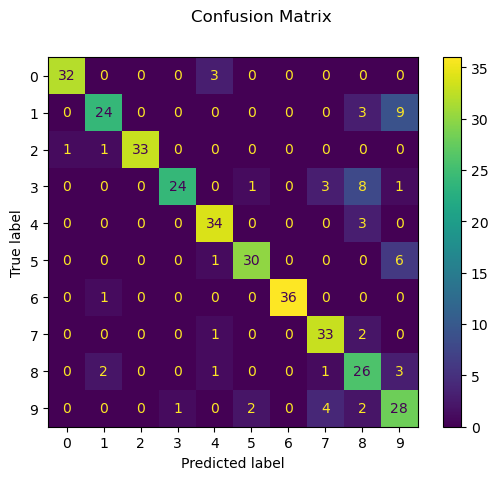

In [28]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,mnb_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [29]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.86      0.67      0.75        36
           2       1.00      0.94      0.97        35
           3       0.96      0.65      0.77        37
           4       0.85      0.92      0.88        37
           5       0.91      0.81      0.86        37
           6       1.00      0.97      0.99        37
           7       0.80      0.92      0.86        36
           8       0.59      0.79      0.68        33
           9       0.60      0.76      0.67        37

    accuracy                           0.83       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.86      0.83      0.84       360




In [41]:
# Create a classifier: Bernoulli NB
bNB = naive_bayes.BernoulliNB(force_alpha=True)


In [42]:
bNB.fit(X_train,y_train)

BernoulliNB(force_alpha=True)

In [43]:
bnb_predicted = bNB.predict(X_test)

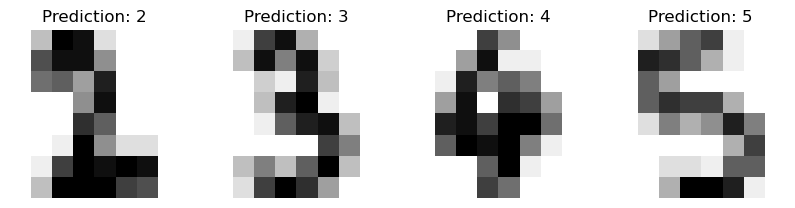

In [44]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test,bnb_predicted):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [45]:
# Classification report:
print(f"Classification report for classifier {bNB}:\n"
      f"{metrics.classification_report(y_test,predicted)}\n")

Classification report for classifier BernoulliNB(force_alpha=True):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  4  7]
 [ 0  3 28  0  0  0  1  0  1  2]
 [ 0  1  0 22  0  4  0  3  7  0]
 [ 0  0  0  0 31  0  0  5  1  0]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  1  0  0  1  0 32  2  0]
 [ 0  5  0  0  0  1  0  3 24  0]
 [ 1  1  0  1  0  3  0  6  0 25]]


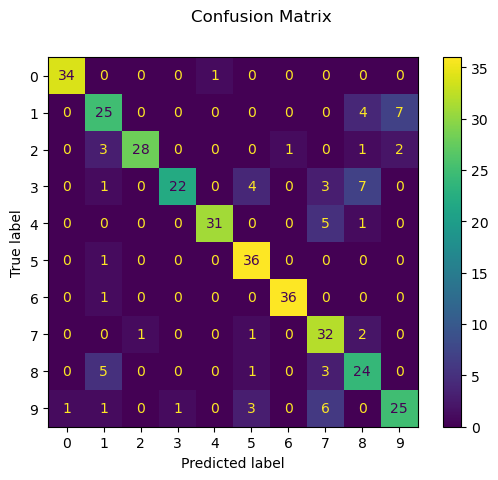

In [46]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [47]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360


